# Welcome to my notebook

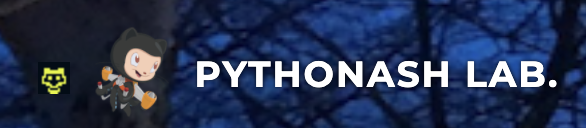

---

## Hi all, I revisit for sharing my experiences.

Now, I will inform you how you can optimize your deep-neural-network.

If you are using deep-neural-network which is fully connected model, it will be useful to you.

It contains 3 points.

### 1. I have trained my deep neural network model in several times.

- You can see how I changed and constructed the model in [my github notebbok](https://github.com/Pythonash/Kaggle-eng-/blob/Brain/Stochastic%20parameter%20finder.ipynb)

- In this procedure, I changed the parameters, the number of neurons, dropout rate, and learning rate, with randomness.

### 2. I identified the relationship between parameters and loss.

- I trained my model by changing the parameters and finally got the logs with fitting 15 hours.

- The logs contain the changed parameters, the number of neurons, dropout rate, learning rate for every iteration and every fold (with 5 folds).

### 3. I found that you don't need to use many neurons and learning rate.

---

Here, there are many chances to upgrade the model through handling hyper-parameter so that you can improve your score in leaderboard.

If you have any questions, please leave the comments.


## **Knowledge can be improved by being shared.**

Please upvote!!


## [You can learn more skills for handling dataset or neural network.]

- [End to end simple and powerful DNN with LeakyReLU](https://www.kaggle.com/pythonash/end-to-end-simple-and-powerful-dnn-with-leakyrelu) - **Ubiquant market prediction (gold medal)**

> [The korean version is here](https://www.kaggle.com/pythonash/leakyrelu)

- [Parallel DNN and CNN network for beginners](https://www.kaggle.com/pythonash/parallel-dnn-and-cnn-network-for-beginners) - **Pawpularity Contest (silver medal)**

- [Handling image and csv dataset at the same time](https://www.kaggle.com/pythonash/how-to-use-csv-and-img-at-the-same-time) - **Pawpularity Contest (bronze medal)**
 
- [Image data handling without memory exploded](https://www.kaggle.com/pythonash/how-to-handle-dataset-for-beginners) - **Pawpularity Contest (bronze medal)**

- [Data handling & Deep learning](https://www.kaggle.com/pythonash/how-to-handle-raw-dataset-and-analyze-with-dl) - **Titanic competition (best score!!, bronze medal)**

- [Deep learning model with SeLU activation function](https://www.kaggle.com/pythonash/selu-activation-function-in-dl) - **Titanic competition (bronze medal)**

- [Preparing a completed dataset with proper imputation method](https://www.kaggle.com/pythonash/making-completed-dataset) - **Titanic competition**
 
 
 
### [More contents or information]

## [Pythonash Github](https://github.com/pythonash)

## [Pythonash blog](https://pythonash.github.io/ash)

**Let's start!**

# Contents

<a id="toc"></a>
- [1. Import Library](#1)
- [2. Load dataset](#2)
- [3. Analysis for log data](#3)
- [4. Review](#4)

<a id="1"></a>
# Import library

In [ ]:
import pandas as pd
import numpy as np
import pdpbox
import seaborn as sns
import statsmodels.api as sm
from pdpbox import info_plots

<a id="2"></a>
# Load dataset

- As I mentioned, this logs are gatherd from [my github notebbok](https://github.com/Pythonash/Kaggle-eng-/blob/Brain/Stochastic%20parameter%20finder.ipynb).

- I trained my model structure with many parameters which are assigned randomly for every iteration.

- And I applied the KFold strategy for identifying the result with robustness.

- The target is min_loss calculated after 5 epochs for each fold.

In [ ]:
logs = pd.read_csv('../input/parameter-finder-logs-data/Parameter finder logs.csv')
logs

<a id="3"></a>
# Analysis for log data

The total case of simulations is 68.

So, we will look the distribution of each parameter with visualization.

## The neurons

In [ ]:
sns.distplot(logs['neurons'])

## The learning rates

In [ ]:
sns.distplot(logs['lr_rate'])

# The minimum loss after training with 5 epochs.

In [ ]:
sns.distplot(logs['min_loss'])

## What is the best result? (Top 10)

In [ ]:
logs.sort_values(['min_loss'], ascending=True)[:10]

## Now we will identify the result for each iteration.

- For each iteration, the best average score is 0.834343 when the neurons are 56, dropout rate is 0.6, and learning rate is 0.001418.

In [ ]:
log_group = logs.groupby(['num_iter']).mean().sort_values(['min_loss'], ascending =  True)
log_group

## We will check the effects of parameters through using linear regression.

If the coefficient is significant, it can say that yeah, it has any relationship with the loss result.

## Devide the log result into every loss result and loss result grouped by each iteration.

### - **logs**: is every loss result for every iteration and every fold.

### - **log_group**: is loss result grouped by each iteration.

## Coefficients of "logs" case.

As you can see, the coefficients are significant.

- If the neurons, dropout rate, and learning rate increased, the minimum loss tended to increase, too.

In [ ]:
model1 = sm.OLS(logs['min_loss'], logs.drop(['num_iter','num_fold','min_loss'],axis=1)).fit()
model1.summary()

## Coefficients of "log_group" case.

As you can see, the coefficients are significant, but the learning rate is a little bit significant less than others.

- If the neurons, dropout rate, and learning rate increased, the minimum loss tended to increase, too.

In [ ]:
model2 = sm.OLS(log_group['min_loss'], log_group.drop(['num_fold','min_loss'],axis=1)).fit()
model2.summary()

## Let's figure out the relationship with pdpbox plot.

### **The case is "logs".**

This graph indicates the loss result about the bins of each parameter.

These results mean that the lower parameters are, the min_loss tends to decrease, too.

In [ ]:
fig, axes, summary_df = info_plots.target_plot(
df = logs.drop(['num_iter','num_fold'],axis=1),
    feature = 'neurons',
    feature_name = 'The # of neurons',
    target = 'min_loss'
)

fig, axes, summary_df = info_plots.target_plot(
df = logs.drop(['num_iter','num_fold'],axis=1),
    feature = 'drop_rate',
    feature_name = 'Drop rate',
    target = 'min_loss'
)

fig, axes, summary_df = info_plots.target_plot(
df = logs.drop(['num_iter','num_fold'],axis=1),
    feature = 'lr_rate',
    feature_name = 'Learning rate',
    target = 'min_loss'
)

## Let's figure out the relationship with pdpbox plot, ver. 2.

### **The case is "log_group".**

This graph indicates the loss result about the bins of each parameter.

These results mean that the lower parameters are, the min_loss tends to decrease, too.

In [ ]:
fig, axes, summary_df = info_plots.target_plot(
df = log_group.drop(['num_fold'],axis=1),
    feature = 'neurons',
    feature_name = 'The # of neurons',
    target = 'min_loss'
)

fig, axes, summary_df = info_plots.target_plot(
df = log_group.drop(['num_fold'],axis=1),
    feature = 'drop_rate',
    feature_name = 'Drop rate',
    target = 'min_loss'
)

fig, axes, summary_df = info_plots.target_plot(
df = log_group.drop(['num_fold'],axis=1),
    feature = 'lr_rate',
    feature_name = 'Learning rate',
    target = 'min_loss'
)

## How will your model inference the relationship between parameters and loss results: The evidence from linear regression.

### **The case is "logs".**

- The values in box indicate the median loss of each interval when linear regression inferences the loss reulst with given parameters.

- In this analysis, we can find that each parameter affects the positive direction on output (loss result).

In [ ]:
fig, axes, summary_df = info_plots.actual_plot(
    model = model1,
    X = logs.drop(['num_iter','num_fold','min_loss'],axis=1),
    feature = 'neurons',
    feature_name = 'The # of neurons',
    predict_kwds = {}
)

fig, axes, summary_df = info_plots.actual_plot(
    model = model1,
    X = logs.drop(['num_iter','num_fold','min_loss'],axis=1),
    feature = 'drop_rate',
    feature_name = 'Drop rate',
    predict_kwds = {}
)

fig, axes, summary_df = info_plots.actual_plot(
    model = model1,
    X = logs.drop(['num_iter','num_fold','min_loss'],axis=1),
    feature = 'lr_rate',
    feature_name = 'Learning rate',
    predict_kwds = {}
)

## How will your model inference the relationship between parameters and loss results: The evidence from linear regression, ver 2.

### **The case is "log_group".**

- The values in box indicate the median loss of each interval when linear regression inferences the loss reulst with given parameters.

- In this analysis, we can find that each parameter affects the positive direction on output (loss result).

In [ ]:
fig, axes, summary_df = info_plots.actual_plot(
    model = model2,
    X = log_group.drop(['num_fold','min_loss'],axis=1),
    feature = 'neurons',
    feature_name = 'The # of neurons',
    predict_kwds = {}
)

fig, axes, summary_df = info_plots.actual_plot(
    model = model2,
    X = log_group.drop(['num_fold','min_loss'],axis=1),
    feature = 'drop_rate',
    feature_name = 'Drop rate',
    predict_kwds = {}
)

fig, axes, summary_df = info_plots.actual_plot(
    model = model2,
    X = log_group.drop(['num_fold','min_loss'],axis=1),
    feature = 'lr_rate',
    feature_name = 'Learning rate',
    predict_kwds = {}
)

<a id="4"></a>
# Review

From my notebook, you can identify that a deep neural network will need a few neurons, dropout rate, and learning rate in this competition.

Of course, it didn't contain all the cases.

There are many deep neural networks, which may differ case by case a little bit.

But, if you use the sequential model with fully-connected, it might not be different as much as your model's complexity.

I hope that my short report will be helpful to you!!

It has done!!

If this notebook is helpful to you, give me upvotes!!

Thank you for viewing.